###  **Capstone Project -Road Collisions Severity Predictor**

#### By-Bishal Kumar Sahoo

#### Introduction: Business Problem:


###### Background:
Since the invention of the automobile road and highways became one of the largest life takers as mortality rates are higher than ever in the past 10 years. Each year around 20-30 Million people get into a road accident in which around 10% of those lose their lives. Road accidents are a serious shame for our society and still we are not in a state to reduce it. Most of the innocent casualties are of the pedestrians , cyclists and the bikers and between the age of 20-35 yrs, the future of any country and the solo earners of a family. Naturally, a question to be asked is what is the cause of such a high percentage of car accidents.

Problem Description
We have to gather old accident record and its severity for a place with other informations like location of accident, number of people involved, number of pedestrians, number of vehicles time and date of accident, way of accident, road condition, lighting and whether at place of accident and create a machine learning model with this data so that later if we pass the following details , the model can predict the severity to us.

Predicting the data will help us to get cautious in advance and then it will be the person's choice to whether they should proceed on the same road with precaution or do a detour to a safer road.

In this project we will try to predict Injury Collision and Property Damage Only Collision, this report are aim to stakeholders interested preventing and reducing injury collisions and Property Damage Only Collision.

### Data: 
Data requirement
According to the problem description We need a dataset which has a large combination of the data related to a particular place which can be used to create a best suitable model and predict the severity of accident by using the required data. The dimensions of the dataset should be large and should have a high number of entries for better accuracy of model.

The quality we need in our data are -

It should have a large amount of data for better model training
The data should have a column which shows the severity level of accident.
Other necessary traits are:
Condition of road, weather, light at place of accident
Driver behaviour and consciousness
Detailed description of collision with date and time and location
Number of person and vehicles involved.

### DATA Description
The data we will be using for the project is from Seattle, Wasington, US named as “Data-Collisions.csv” which is publicly available at this link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. It has stored data from the year 2004-Present. It is a large dataset with dimension 193673 x 38 to work on. It has a special column showing the Severity of the collision which can be used for training and predicting the model.

In [2]:
import pandas as pd
import numpy as np

In [3]:

df= pd.read_csv('Data-Collisions.csv')

C:\Users\LENOVO\Anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [6]:
df.shape 

(194673, 38)

In [7]:

df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [9]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [10]:
df.groupby(['ROADCOND','LIGHTCOND','SPEEDING','ST_COLCODE'])['SEVERITYCODE'].value_counts()

ROADCOND  LIGHTCOND                SPEEDING  ST_COLCODE  SEVERITYCODE
Dry       Dark - No Street Lights  Y         14          2               1
                                             23          1               1
                                             32          1               5
                                                         2               2
                                             50          2               7
                                                                        ..
Wet       Unknown                  Y         28          1               1
                                             30          1               1
                                             32          1               3
                                                         2               1
                                             50          1               4
Name: SEVERITYCODE, Length: 898, dtype: int64

In [11]:
df.groupby('PEDCYLCOUNT')['SEVERITYCODE'].value_counts()

PEDCYLCOUNT  SEVERITYCODE
0            1               135806
             2                53383
1            2                 4762
             1                  679
2            2                   43
Name: SEVERITYCODE, dtype: int64

## Methodology:
In this project we will direct our efforts on creating a Machine Learning model for the prediction of the severity of an accident only by getting some description data of the situation and later plan our future plan.

Firstly, now we will separate between necessary data neend for model creating and training and the non essential data for the model.
Then, We will remove all the NaN(not a number) values and replace them with appropriate solutions.
Later,Take care with the non accurate data types and get them back like with the date case(it's datatype is object)
After that we will convert the categorical data with numerical data. Simple ones with just replacing commands and the difficult ones with one hot encoding method.
Then, try to find some pattern by splitting the datetime into daysofweek , month and hours. directly or by plotting a graph
When satisfied with the data selected we will split it into train and test data
Train our decision tree model with training and predict the test data and calculate the accuracy of our model.
If the f1-score is satisfactory, we will train our final model with whole data, as every data is important

### DATA ANALYSIS: 
#### Pre-processing: Feature selection/extraction
From above data we can see that the data can be splited into two parts,

The accident severity predictor part,
The location part.
So, lets create a new df named 'df_pred' for the prediction with useful attributes

In [12]:
df_pred = df[['OBJECTID','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','SDOT_COLCODE','INATTENTIONIND',
             'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','ST_COLCODE']].copy(deep=True)

In [13]:
df_pred.describe(include='all')

,OBJECTID,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
count,194673.000000,192747,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673.000000,29805,189789,189592,189661,189503,4667,9333,194655
unique,NaN,3,NaN,NaN,NaN,NaN,162058,NaN,1,4,11,9,9,1,1,115
top,NaN,Block,NaN,NaN,NaN,NaN,11/2/2006,NaN,Y,N,Clear,Dry,Daylight,Y,Y,32
freq,NaN,126926,NaN,NaN,NaN,NaN,96,NaN,29805,100274,111135,124510,116137,4667,9333,27612
mean,108479.364930,NaN,2.444427,0.037139,0.028391,1.920780,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,62649.722558,NaN,1.345929,0.198150,0.167413,0.631047,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,54267.000000,NaN,2.000000,0.000000,0.000000,2.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,106912.000000,NaN,2.000000,0.000000,0.000000,2.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,162272.000000,NaN,3.000000,0.000000,0.000000,2.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_pred.dtypes

OBJECTID           int64
ADDRTYPE          object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
SDOT_COLCODE       int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
ST_COLCODE        object
dtype: object

**Convert to Date Time Object**

In [15]:
df_pred['INCDTTM'] = pd.to_datetime(df_pred['INCDTTM'])
df_pred['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
3        2013-03-29 09:26:00
4        2004-01-28 08:04:00
                 ...        
194668   2018-11-12 08:12:00
194669   2018-12-18 09:14:00
194670   2019-01-19 09:25:00
194671   2019-01-15 16:48:00
194672   2018-11-30 15:45:00
Name: INCDTTM, Length: 194673, dtype: datetime64[ns]

**Removing The NULL Values**

In [16]:
df_pred.isnull().sum()

OBJECTID               0
ADDRTYPE            1926
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
dtype: int64

In [17]:
df_pred['ADDRTYPE']=df_pred['ADDRTYPE'].fillna(df_pred['ADDRTYPE'].mode().iloc[0])
df_pred['UNDERINFL']=df_pred['UNDERINFL'].fillna(df_pred['UNDERINFL'].mode().iloc[0])
df_pred['WEATHER']=df_pred['WEATHER'].fillna(df_pred['WEATHER'].mode().iloc[0])
df_pred['ROADCOND']=df_pred['ROADCOND'].fillna(df_pred['ROADCOND'].mode().iloc[0])
df_pred['LIGHTCOND']=df_pred['LIGHTCOND'].fillna(df_pred['LIGHTCOND'].mode().iloc[0])
df_pred['ST_COLCODE']=df_pred['ST_COLCODE'].fillna(df_pred['ST_COLCODE'].mode().iloc[0])

#Converting nan values to 0
df_pred['INATTENTIONIND']=df_pred['INATTENTIONIND'].fillna(0)
df_pred['SPEEDING']=df_pred['SPEEDING'].fillna(0)
df_pred['PEDROWNOTGRNT']=df_pred['PEDROWNOTGRNT'].fillna(0)

In [18]:
df_pred.isnull().sum()

OBJECTID          0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDTTM           0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
dtype: int64

In [19]:
#datalabeling
df_pred['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)
df_pred['INATTENTIONIND'].replace(to_replace='Y', value=1,inplace=True)
df_pred['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_pred['UNDERINFL']=df_pred['UNDERINFL'].astype(dtype='int64')
df_pred['PEDROWNOTGRNT'].replace(to_replace='Y', value=1,inplace=True)
df_pred['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)

#for colcode
df_pred['ST_COLCODE'].replace(to_replace=' ', value=np.nan,inplace=True)
df_pred['ST_COLCODE'].fillna(method='ffill', inplace = True)
df_pred['ST_COLCODE']=df_pred['ST_COLCODE'].astype(dtype='int64')

In [20]:
df_pred['SEVERITYCODE'] = df['SEVERITYCODE'].copy(deep=True)

In [21]:
df_pred.dtypes

OBJECTID                   int64
ADDRTYPE                   int64
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND             int64
UNDERINFL                  int64
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT              int64
SPEEDING                   int64
ST_COLCODE                 int64
SEVERITYCODE               int64
dtype: object

In [22]:
df_pred['DAYOFWEEK'] = df_pred['INCDTTM'].dt.dayofweek
df_pred['MONTH'] = df_pred['INCDTTM'].dt.month
df_pred['HOUR'] = df_pred['INCDTTM'].dt.hour
df_pred.head()

,OBJECTID,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEVERITYCODE,DAYOFWEEK,MONTH,HOUR
0,1,1,2,0,0,2,2013-03-27 14:54:00,11,0,0,Overcast,Wet,Daylight,0,0,10,2,2,3,14
1,2,0,2,0,0,2,2006-12-20 18:55:00,16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,1,2,12,18
2,3,0,4,0,0,3,2004-11-18 10:20:00,14,0,0,Overcast,Dry,Daylight,0,0,32,1,3,11,10
3,4,0,3,0,0,3,2013-03-29 09:26:00,11,0,0,Clear,Dry,Daylight,0,0,23,1,4,3,9
4,5,1,2,0,0,2,2004-01-28 08:04:00,11,0,0,Raining,Wet,Daylight,0,0,10,2,2,1,8


In [23]:
df_pred.groupby(['MONTH','DAYOFWEEK'])['SEVERITYCODE'].value_counts().head(50)

MONTH  DAYOFWEEK  SEVERITYCODE
1      0          1               1501
                  2                624
       1          1               1879
                  2                720
       2          1               1684
                  2                728
       3          1               1842
                  2                782
       4          1               1955
                  2                785
       5          1               1574
                  2                598
       6          1               1269
                  2                466
2      0          1               1362
                  2                548
       1          1               1452
                  2                604
       2          1               1609
                  2                616
       3          1               1490
                  2                669
       4          1               1729
                  2                675
       5          1              

In [24]:
df_pred.groupby(['HOUR'])['SEVERITYCODE'].value_counts().head()

HOUR  SEVERITYCODE
0     1               25129
      2                9252
1     1                2577
      2                 831
2     1                2736
Name: SEVERITYCODE, dtype: int64

import matplotlib.pyplot as plt
import seaborn as sns

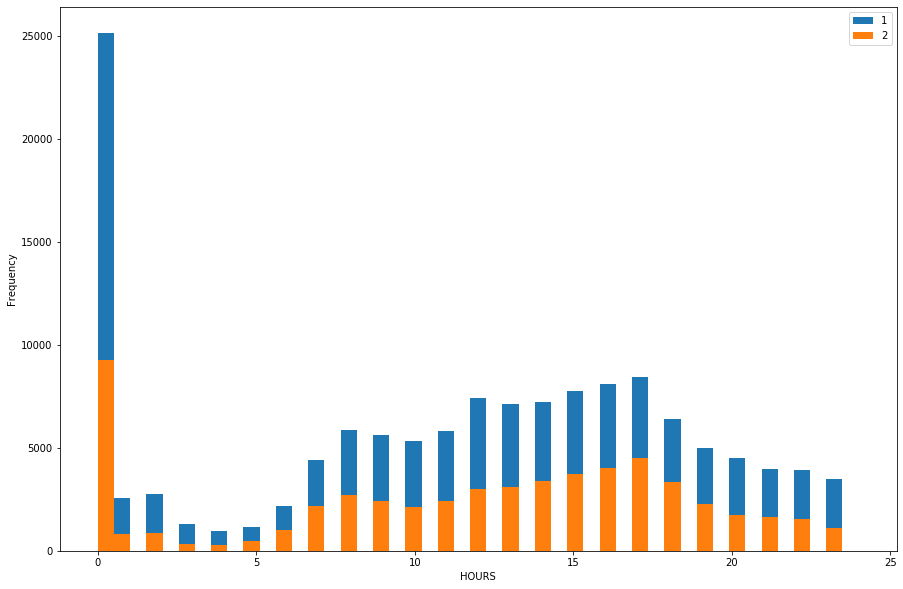

In [28]:
df_pred.groupby('SEVERITYCODE')['HOUR'].plot(kind='hist',bins=np.linspace(0,24,48), figsize=(15,10),
                                            legend=True)
plt.xlabel("HOURS")
plt.show()


This graph clearly shows that the accident is more likely to occur at 00:00. the percntage of accident is very low from 1:00 to 7:00 and 19:00 to 23:00.

Therefore, create a group with a threshold of 5000 for severity 1 i.e 00:00 and 8:00-18:00 is 1 other is 0

In [29]:
df_pred['HOUR_GP']= df_pred['HOUR'].apply(lambda x: 1 if (x>7 and x<19) or (x==0)  else 0)
df_pred[['HOUR','HOUR_GP']]

,HOUR,HOUR_GP
0,14,1
1,18,1
2,10,1
3,9,1
4,8,1
...,...,...
194668,8,1
194669,9,1
194670,9,1
194671,16,1


In [31]:
df_pred.groupby(['HOUR_GP'])['SEVERITYCODE'].value_counts()

HOUR_GP  SEVERITYCODE
0        1                36182
         2                14270
1        1               100303
         2                43918
Name: SEVERITYCODE, dtype: int64

## Now check whether road condition, speeding and light condition

In [33]:
df_pred.groupby(['WEATHER','ROADCOND','LIGHTCOND','SPEEDING'])['SEVERITYCODE'].value_counts().head(50)

WEATHER            ROADCOND    LIGHTCOND                 SPEEDING  SEVERITYCODE
Blowing Sand/Dirt  Dry         Dark - No Street Lights   0         1                   1
                               Dark - Street Lights On   0         2                   5
                                                                   1                   4
                               Dawn                      0         2                   1
                               Daylight                  0         1                  16
                                                                   2                   3
                               Dusk                      0         1                   2
                               Unknown                   0         1                   1
                   Ice         Dark - Street Lights On   0         1                   1
                               Daylight                  0         1                   3
                              

In [34]:
features= df_pred[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ST_COLCODE','SDOT_COLCODE','INATTENTIONIND',
                 'UNDERINFL','PEDROWNOTGRNT','SPEEDING','HOUR_GP']].copy(deep=True)

In [35]:

features = pd.concat([features,pd.get_dummies(df_pred['WEATHER'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features = pd.concat([features,pd.get_dummies(df_pred['ROADCOND'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features = pd.concat([features,pd.get_dummies(df_pred['LIGHTCOND'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ST_COLCODE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,2,0,0,2,11,16,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,4,0,0,3,32,14,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,3,0,0,3,23,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [39]:
X=features
X[0:5]

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ST_COLCODE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,2,0,0,2,11,16,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,4,0,0,3,32,14,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,3,0,0,3,23,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [40]:
y=df['SEVERITYCODE'].values
y[:5]

array([2, 1, 1, 1, 2], dtype=int64)

### Normalize of data

In [41]:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:1]

array([[ 1.36398593, -0.33020207, -0.18743029, -0.16958841,  0.12553783,
        -0.88333125, -0.41751024, -0.42518348, -0.2217116 , -0.1567239 ,
        -0.22440165,  0.59145941, -0.01696304, -1.21707436, -0.05414257,
         2.45445634, -0.00506801, -0.45298634, -0.011333  , -0.02409974,
        -0.06841713, -1.4099744 , -0.07905204, -0.01813462, -0.01963186,
        -0.07200071, -0.02431221,  1.76085874, -0.08920831, -0.07872239,
        -0.576075  , -0.00751719, -0.1141037 ,  0.77768637, -0.17682024]])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train , x_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (155738, 35) (155738,)
Test set: (38935, 35) (38935,)


So we're using DECISION TREE for model creating and prediction

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy") 
dt = DecisionTreeClassifier(criterion="entropy")

In [45]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
yhat= dt.predict(x_test)

In [47]:
#model_evaluation
from sklearn.metrics import f1_score

In [48]:

f1s = f1_score(y_test,yhat)
print("The f1 score of the dt model is --> ",f1s)

The f1 score of the dt model is -->  0.8308927727916864


Our model is having a F1 score (Unkown data) of 0.8306.
Therefor our model is sucessful and no changes is needed, now we don't want to waste any data, so we'll train the model with test data too.


## RESULTS
As from above methodology and data analysis, we say that our data performed very well with known as well as the unknown data .

The model shows a 0.8306 F1 score on unknown data.

So, this model can be used to predict the accident severity just by giving the necessary data and the model will predict the severity for them. A lot of possible casualties and loss of property and life can be minimised by taking precaution measures.

## DISCUSSION
This data was well collected and stored. The data was more than enough to predict the severity. So anyone living in Seattle or someone who is planning to visit can formally use this model to predict the accident severity of that place. They can plan their journey accordingly and mark the safe and unsafe areas. Even more attributes could be used to predict the data but they were not that precise. And even selecting more data will make our model too biased for our data plus start predicting the noise which is just waste. While analysing the data we saw that the months and days of week had not much difference to the collisons , they were just consistent and that's why they were dropped as we need a pattern to predict the right model. Adding average data will just put load on our machine.

We used decision tree in this prediction Because the decision tree is fast and processes a well accurate model. As our data had a dimension of 194673 x 35, training with any other machine learning was not proceeding and the notebook plus kernel kept crashing. So our model should be fast with accuracy to the decision tree provided in that environmen

## CONCLUSION
Purpose of this model was to create a model that can predict the accident severity just by knowing the basic component of that place. Our analysis clearly shows that this data was excellent data which helped our data to achieve a final f1 score of 86.36%. So anyone living in Seattle or someone who is planning to visit can formally use this model to predict the accident severity of that place. They can plan their journey accordingly and mark the safe and unsafe areas further planning depends on them. This model not only will help the general public, but other concerned authorities could also see this and find the areas that are red zones at particular and save precious lives. they can even put the barricades to alert the upcoming traffic. Other concerned authorities who keep the condition of road and light could mark the places which have problems and solve them.

Final decision on journey planning will be made by public based on specific characteristics of that location and past history of collison.